# MNIST image classification using Neural network

*Objective* : Create a neural network to classify the famous mnist images, so that
the internals could be understood. Creating something from scratch, although time-consuming 
can provide more insight and more knowledge on how things work.

Therefore this effort will involve only usage of basic libraries. 

The core of the network is present in network.py which is created while reading through 
Michael Nielsen's excellent book [Neural networks and deep learning][book_url]. Some of the utilities are present in the utility module.

[book_url]: http://neuralnetworksanddeeplearning.com/index.html

**TODO**
1. Use different activation functions : Relu, elu, ...
2. Use dropouts
3. Batch normalization
4. Use Kaiming initialization
5. Deeper architecture
6. SGDR
7. Learning rate finder


## Imports

In [1]:
import numpy as np
import random
import mnist_loader
import network 
from utilities import utility

%matplotlib inline

## Data loading 

In [2]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
print(f'training data size: {len(training_data)}')
print(f'validation data size: {len(validation_data)}')
print(f'test data size: {len(test_data)}')

training data size: 50000
validation data size: 10000
test data size: 10000


# Training the neural network

## Model Architecture

* Input Layer size : 784 (28 X 28)
* Hidden layer size : 1 [30] 
* Output layer : 10

* Activations used : sigmoid
* Cost/Loss function : Mean squared error
* Optimizer used : None

First we will begin off with a very basic neural network with 1 hidden layer.

In [3]:
net = network.Network([784, 30, 10])
net.SGD(training_data, epochs=20, mini_batch_size=10, eta=3.0, val_data=validation_data)

Epoch: 0, train err: 0.9085 val err: 0.9132
Epoch: 1, train err: 0.9276 val err: 0.9316
Epoch: 2, train err: 0.9345 val err: 0.9367
Epoch: 3, train err: 0.9379 val err: 0.9379
Epoch: 4, train err: 0.9466 val err: 0.9431
Epoch: 5, train err: 0.9486 val err: 0.9444
Epoch: 6, train err: 0.9519 val err: 0.9440
Epoch: 7, train err: 0.9500 val err: 0.9428
Epoch: 8, train err: 0.9539 val err: 0.9484
Epoch: 9, train err: 0.9584 val err: 0.9482
Epoch: 10, train err: 0.9595 val err: 0.9485
Epoch: 11, train err: 0.9605 val err: 0.9488
Epoch: 12, train err: 0.9618 val err: 0.9474
Epoch: 13, train err: 0.9648 val err: 0.9500
Epoch: 14, train err: 0.9643 val err: 0.9520
Epoch: 15, train err: 0.9650 val err: 0.9522
Epoch: 16, train err: 0.9665 val err: 0.9543
Epoch: 17, train err: 0.9673 val err: 0.9515
Epoch: 18, train err: 0.9669 val err: 0.9522
Epoch: 19, train err: 0.9692 val err: 0.9539
Done


Let's see how our model fares on the test data

In [4]:
net.evaluate(test_data=test_data)

0.9509

Not a great model, but it's not too bad for a first attempt.
Let's save this model so that we could reuse this one at a later time.

In [5]:
net.save_model('model_v1.json')

# Visualization

Let's take a look at some of the images we misclassified

In [6]:
img_data, title_data = net.getn_misclassified(test_data=test_data)
def plot_gallery(img_data, title_data, n_row=1, n_col=5):
    grid_size = n_row * n_col
    rand = random.randint(0, len(img_data))
    utility.plot_gallery(img_data[rand:rand+grid_size], title_data[rand:rand+grid_size], n_row=n_row, n_col=n_col)

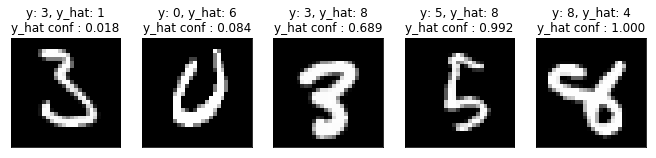

In [7]:
plot_gallery(img_data, title_data)

Hmmm these don't particularly look very hard to distinguish. Let's hope in the next iteration the model would be able to classify better.